In [73]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
from pandas_datareader import data as wb
from datetime import datetime, timedelta
from iexfinance.stocks import get_historical_data
from iexfinance.refdata import get_symbols
import json
import requests
import random
import os

In [74]:
csv_path = Path('S&P500.csv')
sp500 = pd.read_csv(csv_path)
sp500

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology
...,...,...,...
500,XYL,Xylem Inc.,Industrials
501,YUM,Yum! Brands Inc,Consumer Discretionary
502,ZBH,Zimmer Biomet Holdings,Health Care
503,ZION,Zions Bancorp,Financials


In [75]:
grouped_sectors = sp500.groupby(['Sector']).count()
grouped_sectors

,Symbol,Name
Sector,,
Consumer Discretionary,84,84
Consumer Staples,34,34
Energy,32,32
Financials,68,68
Health Care,61,61
Industrials,67,67
Information Technology,70,70
Materials,25,25
Real Estate,33,33


In [76]:
index = sp500.index.values.tolist()

In [77]:
index.sort()

In [79]:
index = ['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 
         'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMG', 
         'AMGN', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI',
         'AVB', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BDX', 'BEN', 'BF.B', 'BHF', 
         'BHGE', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY','BRK.B', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBOE', 
         'CBS', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA',
         'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM', 'CSCO',
         'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR',
         'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DWDP', 'DXC',
         'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ESRX', 'ESS',  'ETFC', 
         'ETN', 'ETR', 'EVHC', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV',
         'FIS', 'FISV', 'FITB','FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GGP', 'GILD',
         'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA',
         'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HII', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HRS', 'HSIC',
         'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IQV', 'IR',
         'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC',
         'KMB', 'KMI', 'KMX', 'KO', 'KORS', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLL', 'LLY', 'LMT', 'LNC',
         'LNT', 'LOW', 'LRCX', 'LUK', 'LUV', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ',
         'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MMM', 'MNST', 'MO', 'MON', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT',
         'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NCLH', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN', 'NOC',
         'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY',
         'PAYX', 'PBCT', 'PCAR', 'PCG', 'PCLN', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 
         'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PX', 'PXD', 'PYPL', 'QCOM', 
         'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBAC', 
         'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRCL', 'SRE', 
         'STI', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYMC', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX',
         'TMK', 'TMO', 'TPR', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TSS', 'TWX', 'TXN', 'TXT', 'UA', 'UAA', 'UAL', 'UDR', 'UHS',
         'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'V','VAR', 'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 
         'VRSN', 'VRTX','VTR','VZ','WAT', 'WBA','WDC','WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB','WMT', 'WRK', 'WU', 'WY', 'WYN', 
         'WYNN', 'XEC', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [ ]:
tickers = random.sample(index,k=100)
tickers

In [81]:
data_df = pd.DataFrame()

In [82]:
index = ['DXC', 'BBY', 'AMG', 'CNP', 'WMT', 'MRK', 'NEM', 'VFC', 'MDT', 'HST', 'MTD', 'CCI', 'KMI',
 'RMD', 'LUV', 'NWS', 'AMGN', 'APD', 'TGT', 'MYL', 'GPC', 'FCX', 'UA', 'DISCK', 'FISV', 'ACN',
 'SRCL', 'IT', 'PHM', 'ALB', 'AAPL', 'EFX', 'FE', 'COST', 'GWW', 'M', 'CRM', 'LKQ', 'AON',
 'PEP', 'RJF', 'ORCL', 'MHK', 'PPL', 'FMC', 'OKE', 'EQR', 'RCL', 'IRM', 'BA', 'ABC', 'GIS',
 'SYF', 'BMY', 'ADBE', 'SNPS', 'BWA', 'MSI', 'COF', 'LYB', 'RTN', 'FFIV', 'HLT', 'CVS', 'NEE',
 'KMX', 'INCY', 'MGM', 'AES', 'GM', 'FDX', 'ADP', 'HOLX', 'NRG', 'NBL', 'APC', 'COG', 'OXY',
 'HCP', 'CSRA', 'HRB', 'AJG', 'CINF', 'TXN', 'ETN', 'EXPE', 'TMO', 'BSX', 'CTAS', 'WBA', 'UNH',
 'HSY', 'FB', 'EIX', 'SBUX', 'MCO', 'HII', 'RL', 'LNT', 'AXP']

In [83]:
tickers1 = ['DXC', 'BBY', 'AMG', 'CNP', 'WMT', 'MRK', 'NEM', 'VFC', 'MDT', 'HST', 'MTD', 'CCI', 'KMI']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df1 = pd.DataFrame()

for t in tickers1:
    stocks_df1[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [84]:
tickers2 = ['RMD', 'LUV', 'NWS', 'AMGN', 'APD', 'TGT', 'MYL', 'GPC', 'FCX', 'UA', 'DISCK', 'FISV', 'ACN']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df2 = pd.DataFrame()

for t in tickers2:
    stocks_df2[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [85]:
tickers3 = ['RMD', 'LUV', 'NWS', 'AMGN', 'APD', 'TGT', 'MYL', 'GPC', 'FCX', 'UA', 'DISCK', 'FISV', 'ACN']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df3 = pd.DataFrame()

for t in tickers3:
    stocks_df3[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [86]:
tickers4 = ['SRCL', 'IT', 'PHM', 'ALB', 'AAPL', 'EFX', 'FE', 'COST', 'GWW', 'M', 'CRM', 'LKQ', 'AON']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df4 = pd.DataFrame()

for t in tickers4:
    stocks_df4[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [87]:
tickers5 = ['PEP', 'RJF', 'ORCL', 'MHK', 'PPL', 'FMC', 'OKE', 'EQR', 'RCL', 'IRM', 'BA', 'ABC', 'GIS']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df5 = pd.DataFrame()

for t in tickers5:
    stocks_df5[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [88]:
tickers6 = ['SYF', 'BMY', 'ADBE', 'SNPS', 'BWA', 'MSI', 'COF', 'LYB', 'RTN', 'FFIV', 'HLT', 'CVS', 'NEE']
start_date = pd.to_datetime('2015-1-1')
end_date = pd.to_datetime('2020-1-10')
stocks_df6 = pd.DataFrame()

for t in tickers6:
    stocks_df6[t]=wb.DataReader(t, data_source = 'yahoo', start = start_date, end = end_date) ['Adj Close']

In [91]:
combined_df_1 = pd.concat([stocks_df1,stocks_df2,stocks_df3,stocks_df4,stocks_df5,stocks_df6], axis = 'columns', join='inner')
#combined_df_1.reset_index(inplace = True)
combined_df_1

,DXC,BBY,AMG,CNP,WMT,MRK,NEM,VFC,MDT,HST,...,SNPS,BWA,MSI,COF,LYB,RTN,FFIV,HLT,CVS,NEE
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,21.286510,33.869621,204.855331,18.986502,75.800331,49.132111,17.923134,60.863708,64.685036,18.943111,...,43.099998,50.940495,60.183998,73.507614,65.453232,97.415230,130.330002,51.523815,83.878716,91.515312
2015-01-05,20.855738,32.996471,197.427475,18.383881,75.579727,49.862339,18.034346,60.352108,64.415070,18.791948,...,42.540001,49.470169,58.871914,71.814491,62.158897,96.166031,129.759995,49.855358,83.049622,90.546051
2015-01-06,20.909586,32.699589,193.173203,17.974104,76.162109,51.821095,18.785009,59.997307,64.091087,18.712391,...,42.160000,49.125847,58.374233,70.477852,60.842796,95.823280,126.730003,49.398510,83.111382,90.897728
2015-01-07,21.061031,33.642605,197.914215,18.207111,78.182854,52.929340,18.618195,60.764694,65.692909,18.815811,...,42.209999,50.279770,58.301842,71.279854,61.480419,97.022873,128.350006,50.193016,84.610786,91.729759
2015-01-08,21.299976,34.149033,199.929352,18.641003,79.833008,53.994629,18.516251,62.134457,67.267754,19.014713,...,42.860001,51.135921,59.206734,71.974915,63.940933,98.853836,129.649994,51.583401,86.410103,92.287308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,35.330002,87.910004,83.330002,26.750000,117.650002,91.639999,43.259998,99.209999,114.889999,17.570000,...,141.979996,42.180000,166.919998,100.689430,91.309998,226.587006,138.250000,109.419998,73.364891,241.520004
2020-01-07,35.849998,88.410004,82.389999,26.870001,116.559998,89.199997,43.230000,98.720001,114.489998,17.520000,...,142.960007,42.439999,165.720001,99.693291,90.919998,226.539993,136.990005,108.290001,73.086769,241.309998
2020-01-08,36.459999,88.650002,82.529999,26.639999,116.160004,88.599998,42.080002,97.040001,116.500000,17.639999,...,145.860001,42.700001,165.889999,100.749199,90.540001,227.399994,136.440002,109.209999,72.172943,241.199997


In [92]:
combined_df_1.isnull().sum()/len(combined_df_1)

DXC     0.0
BBY     0.0
AMG     0.0
CNP     0.0
WMT     0.0
       ... 
RTN     0.0
FFIV    0.0
HLT     0.0
CVS     0.0
NEE     0.0
Length: 78, dtype: float64

In [93]:
daily_returns = combined_df_1.pct_change()

In [97]:
sharpe_ratio = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
sharpe_ratio

DXC     0.457932
BBY     0.734247
AMG    -0.487524
CNP     0.438343
WMT     0.534870
          ...   
RTN     0.967184
FFIV    0.157512
HLT     0.753610
CVS    -0.012968
NEE     1.292275
Length: 78, dtype: float64

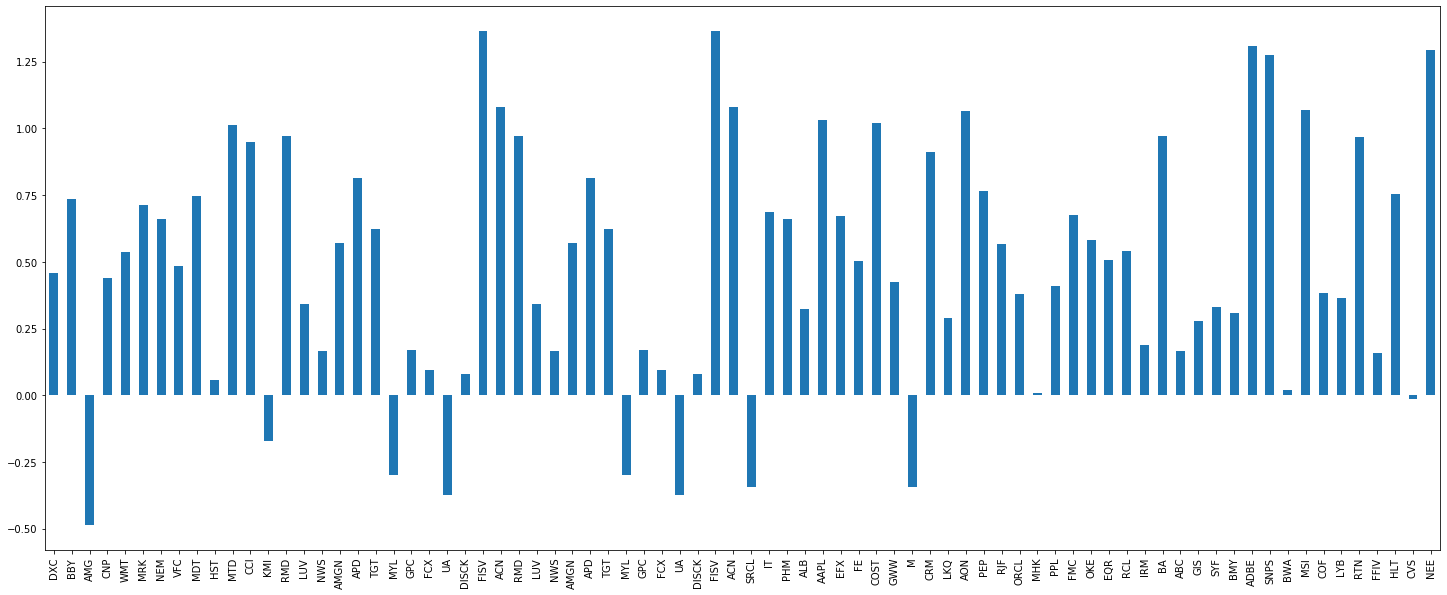

In [99]:
sharpe_ratio.plot(kind='bar', figsize=(25,10))